<a href="https://colab.research.google.com/github/S0ulR/ActividadNro1UAI/blob/master/Red1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing, metrics, model_selection
import pandas as pd

from ucimlrepo import fetch_ucirepo

In [ ]:
# fetch dataset
#iris = fetch_ucirepo(id=53)
iris = fetch_ucirepo(name='Iris')

# data (as pandas dataframes)
df_X = iris.data.features
df_y = iris.data.targets

print(df_X.head())

print(df_y.head())

   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
         class
0  Iris-setosa
1  Iris-setosa
2  Iris-setosa
3  Iris-setosa
4  Iris-setosa


In [ ]:
X = np.array(df_X)
Y = np.array(df_y['class'])
encoder = preprocessing.LabelEncoder()
Y = encoder.fit_transform(Y)
Y_bin= to_categorical(Y)

print(Y)

etiquetas = encoder.inverse_transform([0,1,2])
print("\n\n Etiquetas = ",etiquetas)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


 Etiquetas =  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
Y_bin[[2,3,60,70,120],:]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, Y_train, Y_test = model_selection.train_test_split( \
        X, Y_bin, test_size=0.20) #, random_state=42)

In [ ]:
normalizarEntrada = 1  # 1 si normaliza; 0 si no

if normalizarEntrada:
    # Escala los valores entre 0 y 1
    min_max_scaler = preprocessing.StandardScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_test = min_max_scaler.transform(X_test)

In [ ]:
# Crear un modelo de capas secuenciales
model=Sequential()

# Agregar las capas al modelo
model.add(Input(shape=(13,)))
model.add(Dense(8, activation='tanh'))      # model.add(Dense(2, input_shape=[4], activation='tanh’))
model.add(Dense(3, activation='softmax'))

# Imprimir un resumen del modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 139 (556.00 B)

 Trainable params: 139 (556.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Configuración para entrenamiento
#model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
#model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

model.compile(optimizer=SGD(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# model.fit(X_train,Y_trainB, epochs=100)

es = EarlyStopping(monitor='val_accuracy', patience=30, min_delta=1e-08, restore_best_weights=True)

H = model.fit(x = X_train, y = Y_train, epochs=100, batch_size = 20,
              validation_data = (X_test, Y_test),  callbacks=[es])


Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_2" is incompatible with the layer: expected axis -1 of input shape to have value 13, but received input with shape (20, 4)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(20, 4), dtype=float32)
  • training=True
  • mask=None

In [ ]:
print("épocas = %d" % len(H.history["val_accuracy"]))
print("Epocas = %d" % es.stopped_epoch)

épocas = 108
Epocas = 107


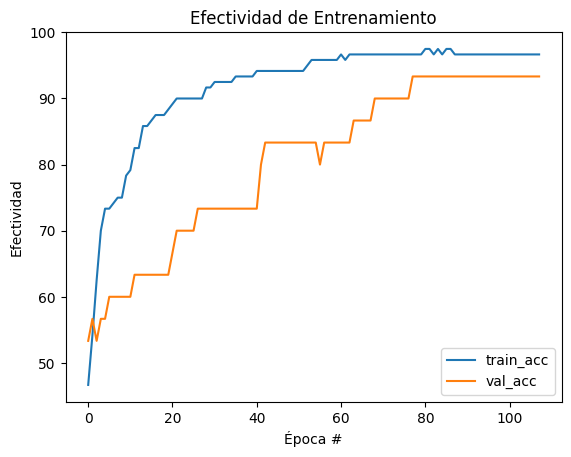

In [ ]:
# dibuja accuracy del progreso del entrenamiento
accuracy = np.array(H.history["accuracy"])
val_accuracy = np.array(H.history["val_accuracy"])

N = np.arange(0, len(accuracy))
plt.figure()
#plt.plot(N, H.history["loss"], label="train_loss")
#plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, 100*accuracy, label="train_acc")
plt.plot(N, 100*val_accuracy, label="val_acc")
plt.title("Efectividad de Entrenamiento")
plt.xlabel("Época #")
plt.ylabel("Efectividad")
plt.legend(loc="lower right")

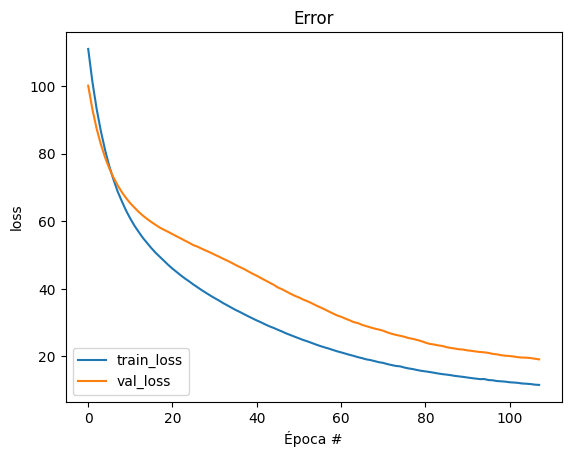

In [ ]:
# dibuja accuracy del progreso del entrenamiento
accuracy = np.array(H.history["loss"])
val_accuracy = np.array(H.history["val_loss"])

N = np.arange(0, len(accuracy))
plt.figure()
#plt.plot(N, H.history["loss"], label="train_loss")
#plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, 100*accuracy, label="train_loss")
plt.plot(N, 100*val_accuracy, label="val_loss")
plt.title("Error")
plt.xlabel("Época #")
plt.ylabel("loss")
plt.legend(loc="lower left")

In [ ]:
# predecir la salida del modelo
Y_pred = model.predict(X_train)

# Convertir la salida del modelo en un número entero
Y_pred2 = np.argmax(Y_pred,axis=1)
Y_true =  np.argmax(Y_train,axis=1)
print("%% aciertos : %.3f" % metrics.accuracy_score(Y_true, Y_pred2))
print(Y_pred[:5,:])
print(Y_pred2[:5])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
% aciertos : 0.967
[[0.945626   0.0497805  0.00459346]
 [0.00245367 0.08511565 0.91243076]
 [0.07464081 0.9017663  0.02359274]
 [0.05616518 0.87544155 0.06839324]
 [0.06195652 0.89972943 0.03831412]]
[0 2 1 1 1]


In [ ]:
# Evaluación del modelo
score = model.evaluate(X_train, Y_train)

print('Error :', score[0])
print('Accuracy:', score[1])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9596 - loss: 0.1610 
Error : 0.1599402278661728
Accuracy: 0.9666666388511658


In [ ]:
report = metrics.classification_report(Y_true, Y_pred2, target_names=etiquetas)
print("Training metrics:\n%s" % report)

MM = metrics.confusion_matrix(Y_true, Y_pred2)
print("Confusion matrix:\n%s" % MM)

Training metrics:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       0.97      0.92      0.94        37
 Iris-virginica       0.93      0.98      0.96        44

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.97      0.97      0.97       120

Confusion matrix:
[[39  0  0]
 [ 0 34  3]
 [ 0  1 43]]


In [ ]:
# predecir la salida del modelo
Y_pred = model.predict(X_test)
Y_pred2 = np.argmax(Y_pred,axis=1)
Y_true =  np.argmax(Y_test,axis=1)
print("%% aciertos X_train : %.3f" % metrics.accuracy_score(Y_true, Y_pred2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
% aciertos X_train : 0.933


In [ ]:
report = metrics.classification_report(Y_true, Y_pred2, target_names=etiquetas)

print("Métricas de la clasificación:\n%s" % report)

Métricas de la clasificación:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.75      1.00      0.86         6

       accuracy                           0.93        30
      macro avg       0.92      0.95      0.92        30
   weighted avg       0.95      0.93      0.94        30



In [ ]:
MM = metrics.confusion_matrix(Y_true, Y_pred2)

print("Confusion matrix:\n%s" % MM)
# Convertimos la matriz de confusión en un DataFrame con etiquetas
df_cm = pd.DataFrame(MM, index=etiquetas, columns=etiquetas)

# Mostramos el DataFrame resultante
print("\n\n",df_cm)

Confusion matrix:
[[11  0  0]
 [ 0 11  2]
 [ 0  0  6]]


                  Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               11                0               0
Iris-versicolor            0               11               2
Iris-virginica             0                0               6


In [ ]:
capaOculta = model.layers[0]
W1, b1 = capaOculta.get_weights()

capaSalida = model.layers[1]
W2,b2 = capaSalida.get_weights()

print("W1")
print(W1)

print("b1")
print(b1)

print("W2")
print(W2)

print("b2")
print(b2)

W1
[[-0.39360282 -0.18581542]
 [ 0.8973059   0.26045796]
 [-0.8904507  -0.7175534 ]
 [-0.2807751  -1.2997338 ]]
b1
[-0.787784    0.99461955]
W2
[[ 1.3238764  -1.6025081  -0.6702582 ]
 [ 1.3779426   0.87979066 -2.5270119 ]]
b2
[-0.20805249  0.01951564  0.18853684]
